In [1]:
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import qutip
from matplotlib.animation import FuncAnimation
from IPython import display
#from qiskit.visualization import plot_bloch_vector

In [34]:
!pip install qutip

In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from numpy import pi


#class experiments contains the real and simulated experiments of a real quantum computer
#the constructor takes in input the number of shots ie of experiments and whether you
#want the simulated data or the real ones
class experiments():
    #default simulated is 1, real 0 meaning we only want simulated values
    def __init__(self,n_of_shots,simulated=1,real=0):
        self.shots=n_of_shots
        self.Xsimulated=0
        self.Ysimulated=0
        self.Zsimulated=0
        self.Xreal=0
        self.Yreal=0
        self.Zreal=0
        if simulated==1:
            self.simulated_X()
            self.simulated_Y()
            self.simulated_Z()
        if real==1:
            self.real_X()
            self.real_Y()
            self.real_Z()
        
        
    def simulated_X(self):
        qr=QuantumRegister(1)
        cr=ClassicalRegister(1)
        circuit=QuantumCircuit(qr,cr)
        circuit.h(qr[0])
        circuit.barrier(qr[0])
        circuit.measure(qr,cr)
        simulator=Aer.get_backend("qasm_simulator")
        result=execute(circuit,backend=simulator,shots=self.shots).result()
        self.Zsimulated=result.get_counts(circuit)
        
    def simulated_Y(self):
        qr=QuantumRegister(1)
        cr=ClassicalRegister(1)
        circuit=QuantumCircuit(qr,cr)
        circuit.h(qr[0])
        circuit.barrier(qr[0])
        circuit.h(qr[0])
        circuit.measure(qr,cr)
        simulator=Aer.get_backend("qasm_simulator")
        result=execute(circuit,backend=simulator,shots=self.shots).result()
        self.Xsimulated=result.get_counts(circuit)
        
    def simulated_Z(self):
        qr=QuantumRegister(1)
        cr=ClassicalRegister(1)
        circuit=QuantumCircuit(qr,cr)
        circuit.h(qr[0])
        circuit.barrier(qr[0])
        circuit.u(pi / 2, 0, pi / 2, qr[0])
        circuit.measure(qr,cr)
        simulator=Aer.get_backend("qasm_simulator")
        result=execute(circuit,backend=simulator,shots=self.shots).result()
        self.Ysimulated=result.get_counts(circuit)
        
    def real_X(self):
        qr=QuantumRegister(1)
        cr=ClassicalRegister(1)
        circuit=QuantumCircuit(qr,cr)
        circuit.h(qr[0])
        circuit.barrier(qr[0])
        circuit.measure(qr,cr)
        
        IBMQ.load_account()
        provider=IBMQ.get_provider("ibm-q")
        qcomp=provider.get_backend("ibmq_belem")
        job=execute(circuit,backend=qcomp,shots=self.shots)
        job_monitor(job)
        result=job.result()
        self.Xreal=result.get_counts(circuit)
    
    def real_Y(self):
        qr=QuantumRegister(1)
        cr=ClassicalRegister(1)
        circuit=QuantumCircuit(qr,cr)
        circuit.h(qr[0])
        circuit.barrier(qr[0])
        circuit.h(qr[0])
        circuit.measure(qr,cr)
        
        IBMQ.load_account()
        provider=IBMQ.get_provider("ibm-q")
        qcomp=provider.get_backend("ibmq_belem")
        job=execute(circuit,backend=qcomp,shots=self.shots)
        job_monitor(job)
        result=job.result()
        self.Yreal=result.get_counts(circuit)
        
    def real_Z(self):
        qr=QuantumRegister(1)
        cr=ClassicalRegister(1)
        circuit=QuantumCircuit(qr,cr)
        circuit.h(qr[0])
        circuit.barrier(qr[0])
        circuit.u(pi / 2, 0, pi / 2, qr[0])
        circuit.measure(qr,cr)
        
        IBMQ.load_account()
        provider=IBMQ.get_provider("ibm-q")
        qcomp=provider.get_backend("ibmq_belem")
        job=execute(circuit,backend=qcomp,shots=self.shots)
        job_monitor(job)
        result=job.result()
        self.Zreal=result.get_counts(circuit)


In [3]:
#NB class mumbers are dictionaries so you must input "0" and "1" to get the associated count
ex1=experiments(75,1,0)
print(ex1.Xsimulated)
print(ex1.Ysimulated)
print(ex1.Zsimulated)
ex1.Xsimulated['1'] = 0

{'0': 75}
{'0': 41, '1': 34}
{'0': 33, '1': 42}


/Users/jucgonzalezes/miniforge3/envs/BQST/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jucgonzalezes/miniforge3/envs/BQST/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [4]:
mesur_list = [0] * ex1.Xsimulated['0'] + [1] * ex1.Xsimulated['1'] + [2] * ex1.Ysimulated['0'] + [3] * ex1.Ysimulated['1'] + [4] * ex1.Zsimulated['0'] + [5] * ex1.Zsimulated['1']

In [5]:
np.random.seed(6)

In [2]:
def Haar_sampling(N):
    l =[0] * N
    for i in range(N):
        M = np.random.normal( size = ( 2, 2 ) ) + 1j * np.random.normal( size = ( 2, 2 ) )
        X = M.dot(M.conj().T)
        l[i] = X/ np.trace(X)
    return l

In [7]:
E0 = np.matrix([[1 , 0],[0 , 0]])
E1 = np.matrix([[0 , 0],[0 , 1]])
H = 1/np.sqrt(2) * np.matrix([[1 , 1],[1 , -1]])
U = 1/np.sqrt(2) * np.matrix([[1 , -1j],[1 , 1j]])

In [8]:
list_mesure = [E0, E1, np.matmul(np.matmul(H,E0),H.H),
               np.matmul(np.matmul(H,E1),H.H),np.matmul(np.matmul(U,E0),U.H), 
               np.matmul(np.matmul(U,E1),U.H) ]

In [9]:
list_mesure = [E0, E1,E0,E1,E0,E1]

In [11]:
def Sequential_MC(N_particuls, list_Mesure, list_instance,particuls,weights,toll):
  N_mesurement = len(list_instance)
  random.shuffle(list_instance)
  Seff=1
  for i in range(N_mesurement):
    outcome = list_Mesure[list_instance[i]]   
#    weight_total_nextstep = 0
 #   for part in range(N_particuls):
#      weight_total_nextstep += np.trace(particuls[part].dot(outcome)).real * weights[part]
    for part in range(N_particuls):
            if list_instance[i]==0 or list_instance[i]==1:  
                p=np.matmul(H,np.matmul(particuls[part],H))
              
            elif list_instance[i]==2 or list_instance[i]==3:
                p=np.matmul(U,np.matmul(particuls[part],U.H)) 
            else:
                p=particuls[part] 
            weights[part] = np.trace(p.dot(outcome)).real * weights[part]
    
    weight_total_nextstep = np.sum(weights)
    for k in range(N_particuls):
        weights[k] = weights[k] / weight_total_nextstep

    Wsq=0
    for m in range(N_particuls):
       Wsq=Wsq+weights[m]**2
    Seff=1/Wsq
    print(Seff)
    print(i)
    if(Seff/N_particuls<toll):
      break
    print("-----------------")
  return weights

In [4]:
toll=0.1
n=500
particuls = Haar_sampling(n)
weights = [1/n] * n
# weigths = Sequential_MC(n,list_mesure,mesur_list,particuls,weights,toll)

In [13]:
def jittering(state):
  lamda,theta,phi=np.random.normal(0, 0.1),np.random.normal(0, 0.1),np.random.normal(0, 0.1)
  U=np.matrix([[np.cos(theta/2), -np.exp(1j*lamda)*np.sin(theta/2)],[np.exp(1j*phi)*np.sin(theta/2), np.exp(1j*(lamda+phi))*np.cos(theta/2)]])
  return np.matmul(U,np.matmul(state,U.H))

In [14]:
def to_index(res):
  index_vec=[]
  for i in range(len(res)):
    j=0
    while j<res[i]:
      j=j+1
      index_vec.append(i)
  return index_vec

In [15]:
def resampling(res,particuls):
  par=particuls
  res=to_index(res)
  for i in range(len(res)):
    par[i]=jittering(particuls[res[i]])
  return par


In [16]:
iter=10
for i in range(iter):
  #order = np.argsort(weights)
  #weight_ordered = [weights[k] for k in order]
  #particul_ordered = [particuls[k] for k in order]
  #weights, particuls = weight_ordered, particul_ordered
  #weights.reverse()
  #particuls.reverse()
  #Wsq=0
  #for i in range(n):
   # Wsq=Wsq+weights[i]**2
  #Seff=1/Wsq
  res=np.random.multinomial(n,pvals=weights)
  particuls=resampling(res,particuls)
  weights = [1/n] * n
  weights=Sequential_MC(n,list_mesure,mesur_list,particuls,weights,toll)



460.6786061663865
0
-----------------
457.24053089217216
1
-----------------
429.83755654833436
2
-----------------
381.52924946178615
3
-----------------
378.302105617788
4
-----------------
437.865425313747
5
-----------------
418.81005811216113
6
-----------------
407.2009573127335
7
-----------------
341.0317510017561
8
-----------------
333.02508795625977
9
-----------------
370.44383828268644
10
-----------------
347.45084906723883
11
-----------------
290.9604465012292
12
-----------------
286.74397758320686
13
-----------------
237.9042222675897
14
-----------------
250.2529563108235
15
-----------------
249.51689102599423
16
-----------------
237.337189506762
17
-----------------
228.4132436969298
18
-----------------
242.47291530812265
19
-----------------
250.11032271256084
20
-----------------
237.6112212710235
21
-----------------
225.7217611443424
22
-----------------
197.92444562258513
23
-----------------
187.890540224462
24
-----------------
181.48461206499306
25
-----

In [19]:
order = np.argsort(weights)
weight_ordered = [weights[k] for k in order]
particul_ordered = [particuls[k] for k in order]
weights, particuls = weight_ordered, particul_ordered

In [20]:
particuls[order[0]]

matrix([[0.34025308-3.77166831e-17j, 0.2747785 -3.50509420e-01j],
        [0.2747785 +3.50509420e-01j, 0.65974692+0.00000000e+00j]])

In [21]:
Level_of_confidence = 0.95

In [22]:
sum = 0
rank = 0
N = len(weights)
while (rank < N) and (sum < Level_of_confidence):
  sum += weights[-rank-1]
  rank += 1

In [23]:
rank

239

In [24]:
max = np.amax(weigths)
print(max)
s = np.sum(weigths)
print(s)

0.0648776667615254
1.0


In [25]:
Id = np.matrix([[1 , 0],[0 , 1]])
sx = np.matrix([[0 , 1] , [1 , 0]])
sy = np.matrix([[0 , -1j] , [1j , 0]])
sz = np.matrix([[1,0] , [0,-1]])

In [11]:
def measure(ρ):
    Id = np.matrix([[1 , 0],[0 , 1]])
    sx = np.matrix([[0 , 1] , [1 , 0]])
    sy = np.matrix([[0 , -1j] , [1j , 0]])
    sz = np.matrix([[1,0] , [0,-1]])    
    x = np.trace(np.dot(ρ, sx)).real
    y = np.trace(np.dot(ρ, sy)).real
    z = np.trace(np.dot(ρ, sz)).real
    return [x, y, z]

In [27]:
R = [measure(rho) for rho in particuls]

C:\Users\sabri\AppData\Local\Temp\ipykernel_22496\1817634693.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


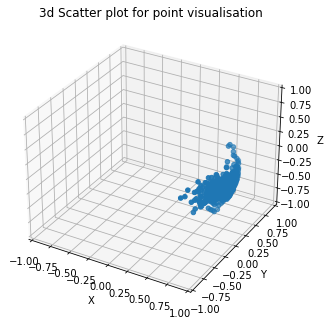

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
 
fig = plt.figure()
ax = p3.Axes3D(fig)
# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')
 
# syntax for 3-D projection
"""for i in range(len(list)):
  z = list[i][2]
  x = list[i][0]
  y = list[i][1]
  ax.scatter(x, y, z)"""
N = len(R)

z = [R[i][2] for i in range(N)]
x = [R[i][0] for i in range(N)]
y = [R[i][1] for i in range(N)]
ax.scatter(x, y, z)
 
# syntax for plotting
ax.set_title('3d Scatter plot for point visualisation')
plt.show()

In [ ]:
Haar

In [16]:
#plot with color for weight visualisation
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
 
fig = plt.figure()

N = len(particuls)
# max = np.amax(weigths)

b = qutip.Bloch3d()

x, y, z = [], [], []
# syntax for 3-D projection
for i in range(N):
  #c = ((1-weigths[i]/max),(1-weigths[i]/max), (1-weigths[i]/max))
  c = (0,0,0)
  p = measure(particuls[i])
  z.append(p[2])
  x.append(p[0])
  y.append(p[1])
  #ax.scatter(x, y, z, c = weights[i]*255*10)


b.add_points([x, y, z])


b.show()

<Figure size 640x480 with 0 Axes>

In [10]:
particuls[0]

array([[0.74562532-5.97883141e-18j, 0.25423723-1.38658264e-01j],
       [0.25423723+1.38658264e-01j, 0.25437468+5.97883141e-18j]])

In [489]:
Wsq=0
for i in range(n):
    Wsq=Wsq+weights[i]**2
Seff=1/Wsq
Seff

240.82243503503818

In [ ]:
s = np.sum(R)

In [ ]:
print(s)

In [ ]:
print(weights[0],weights[-1])